### 1. Why are MPA ratings important? Answer this from the perspective of the content provider and content creator? What implications does ratings have on the audience? Will it be more profitable if content is monetized based on user demography?


From the perspective of content providers:

MPA ratings are essential to comply with age-appropriate content regulations, reducing the risk of legal issues and content bansMPA compliance builds trust with the audience, enhancing the provider's reputation and increasing user loyalty and recommendations. Accurate ratings enable precise audience segmentation for targeted advertising, boosting ad campaign effectiveness and revenue. This helps in delivering highly relevant advertisements to viewers.

From the content creators' perspective:

MPA ratings help creators understand their target audience, aligning content with viewer preferences and age groups.
Creators maintain artistic freedom while responsibly considering mature content, striking a balance between creativity and viewer suitability.Ratings enhance content's marketability and visibility, enabling creators to reach the right audience and increase their work's success.

Considering the impact on the audience:

MPA ratings empower viewers to make informed content choices, especially for family viewing.Accurate ratings help viewers find content that suits their preferences, leading to greater satisfaction and longer platform usage.Ratings aid viewers in discovering content that matches their interests, enhancing satisfaction and platform loyalty, promoting longer user engagement.

Exploring the monetization impact:

Monetizing user demography allows platforms to offer highly targeted advertising, attracting premium rates from advertisers and boosting ad revenue.By tailoring subscription offerings to different age groups and preferences, platforms optimize revenue with customized subscription options.Monetization based on user demography enables personalized content recommendations, enhancing user engagement and retention by delivering content that aligns with individual interests.

### 2. Go through this dataset and list out all the different features in this dataset along with their data types.

In [9]:
import pandas as pd

df=pd.read_csv('netflix_titles.csv')

features_and_types = df.dtypes

print(features_and_types)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


### 3. Are there any null or missing values in this data? If yes, mention all the features that have null values along  with the number of rows or records having null values. How would you prepare this dataset for training a machine learning model?

In [12]:
import pandas as pd


df=pd.read_csv('netflix_titles.csv') 


missing_values = df.isnull().sum() # Checking for missing values 


features_with_missing_values = missing_values[missing_values > 0] # Listing features with missing values and the number of missing values


total_rows_with_missing_values = len(df[df.isnull().any(axis=1)]) # Listing the number of rows or records with missing values

print("Features with missing values:")
print(features_with_missing_values)

print("\nTotal number of rows with missing values:", total_rows_with_missing_values)


Features with missing values:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Total number of rows with missing values: 3475


 Yes, there are missing values in this dataset. The features with null values and the number of records with null values so to prepare this dataset for training a machine learning model

   a. Impute missing values with appropriate strategies, such as mean, median, or mode imputation for numerical features, or a custom imputation method based on the data's characteristics.

   b. Remove rows or columns with a significant number of missing values if the missing values cannot be reasonably imputed.

   c. Utilize advanced imputation techniques like K-nearest neighbors imputation (KNNImputer) or regression-based imputation for more accurate handling of missing data.

   d. If the missing values follow a specific pattern or carry meaningful information, consider creating an additional binary feature to indicate the presence of missing values in the original feature.


#### to prepare this dataset for training a machine learning model there are several steps to preprocess your data

1) Data cleaning and Imputation

2) Data Transformation

3) Feature Selection and Engineering

4) Handling Outliers

Note:if any column contain more number of null values it is important ask to your domain expertise for better result incasae you can show them result doing imputation and many other several method.

### 4. The target column is 'rating'. You will have to build a model which predicts one of the ratings for a given movie with: ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7','R', 'TV-G', 'G', 'NC-17','TV-Y7-FV', 'UR', 'NR'] for a given movie.

In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("netflix_titles.csv") 
pd.set_option('display.max_colwidth',1000)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."


### checking null values

In [33]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### We will now make a determination regarding whether to drop or impute values.

###  1) imputing value and then analysing the importance of feature for training machine learning model

### We will apply label encoding to convert categorical values into numerical representations, facilitating the machine's comprehension of our dataset.

In [279]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Encode each categorical column
for column in df.columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7692,603,1711,72,7,210,274,2577
1,1111,1,1091,4528,409,426,1706,73,11,110,414,1762
2,2222,1,2651,2105,6296,748,1706,73,11,0,242,7341
3,3333,1,3506,4528,7692,748,1706,73,11,0,297,3617
4,4444,1,3861,4528,4815,251,1706,73,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,59,8,70,269,895
8803,8672,1,8773,4528,7692,748,788,70,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,61,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,58,6,206,125,3315


### In the context of imputation, there exist various methods. However, I will proceed with K-nearest neighbors imputation (KNN imputer) as it is founded on the logic of filling in missing values in a dataset by leveraging the k-nearest neighbors approach.

In [334]:
from sklearn.impute import KNNImputer

In [335]:
imputeKNN=KNNImputer(n_neighbors=5000)

In [336]:
df_imputed=imputeKNN.fit_transform(df)

In [337]:
columns = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

df_imputed=pd.DataFrame(df_imputed,columns=columns)
df_imputed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0.00,0.00,1975.00,2295.00,7692.00,603.00,1711.00,72.00,7.00,210.00,274.00,2577.00
1,1111.00,1.00,1091.00,4528.00,409.00,426.00,1706.00,73.00,11.00,110.00,414.00,1762.00
2,2222.00,1.00,2651.00,2105.00,6296.00,748.00,1706.00,73.00,11.00,0.00,242.00,7341.00
3,3333.00,1.00,3506.00,4528.00,7692.00,748.00,1706.00,73.00,11.00,0.00,297.00,3617.00
4,4444.00,1.00,3861.00,4528.00,4815.00,251.00,1706.00,73.00,11.00,110.00,393.00,4416.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671.00,0.00,8770.00,979.00,4677.00,603.00,1419.00,59.00,8.00,70.00,269.00,895.00
8803,8672.00,1.00,8773.00,4528.00,7692.00,748.00,788.00,70.00,14.00,110.00,424.00,8483.00
8804,8673.00,0.00,8774.00,3631.00,3231.00,603.00,1366.00,61.00,8.00,206.00,207.00,5228.00
8805,8674.00,0.00,8777.00,3247.00,7061.00,603.00,665.00,58.00,6.00,206.00,125.00,3315.00


In [339]:
df_imputed.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##### after droping unique value like show id so that it shouldn't effect on training data 

In [340]:
df_imputed=df_imputed.drop(columns=['show_id'])

In [291]:
X=df_imputed.drop(columns=['rating'])
y=df_imputed[['rating']]

### Upon observing the class imbalance in the target column, I have devised a solution involving oversampling techniques. It's worth noting that there are several oversampling methods available to rectify class imbalance in machine learning datasets.

In [342]:
X = df_imputed.drop(columns=['rating'])
y = df_imputed['rating']

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [344]:
X_resampled.shape

(57726, 10)

In [308]:
y_resampled.value_counts()

7.00     3207
11.00    3207
15.00    3207
17.00    3207
5.00     3207
0.00     3207
2.00     3207
1.00     3207
4.00     3207
3.00     3207
10.00    3207
8.00     3207
14.00    3207
13.00    3207
12.00    3207
9.00     3207
6.00     3207
16.00    3207
Name: rating, dtype: int64

### now the target column is balanced 

## next step is scaling feature so that to ensure that all features contribute equally to the model's performance and to prevent issues like slow convergence and numerical instability.

### here i will be using standardization It's appropriate for many algorithms and results in centered data with a consistent scale.

In [309]:
from sklearn.preprocessing import  StandardScaler

In [310]:
# Standardization (Z-score scaling)
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X_resampled)
X_std = pd.DataFrame(X_std, columns=X_resampled.columns) 

In [313]:
final_df = pd.concat([X_std, y_resampled], axis=1)
final_df

,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating
0,-0.48,-1.03,-0.41,1.69,0.56,1.62,0.77,0.99,-0.01,-0.77,7.00
1,2.08,-1.42,1.15,-1.72,-0.27,1.61,0.87,-0.11,0.97,-1.12,11.00
2,2.08,-0.73,-0.54,1.04,1.25,1.61,0.87,-1.32,-0.23,1.25,11.00
3,2.08,-0.36,1.15,1.69,1.25,1.61,0.87,-1.32,0.15,-0.33,11.00
4,2.08,-0.20,1.15,0.34,-1.10,1.61,0.87,-0.11,0.82,0.01,11.00
...,...,...,...,...,...,...,...,...,...,...,...
57721,2.08,-0.09,1.15,-0.84,-2.22,-0.62,0.29,-1.32,1.10,-1.22,17.00
57722,2.08,-0.09,1.15,-0.84,-2.22,-0.62,0.29,-1.32,1.10,-1.22,17.00
57723,-0.48,-1.89,1.15,0.65,1.25,-0.21,0.48,0.31,1.16,0.51,17.00
57724,2.08,-0.73,1.15,-0.19,-0.78,-0.92,0.10,-1.32,-1.36,-1.10,17.00


In [345]:
X=final_df.drop(columns=['rating'])
y=final_df[['rating']]

## analyzing feature importance 

In [346]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a RandomForestClassifier model (replace this with your data)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X,y)

# Access the feature importances
feature_importance_rf = clf.feature_importances_

# Calculate importances as percentages
total_importance = sum(feature_importance_rf)
feature_importance_percentage = [(importance / total_importance) * 100 for importance in feature_importance_rf]

# Print feature importances in percentage form
print("Feature Importance from Random Forest (in Percentage):")
for feature_name, importance in zip(X.columns, feature_importance_percentage):
    print(f"{feature_name}: {importance:.2f}%")
    

Feature Importance from Random Forest (in Percentage):
type: 1.20%
title: 10.51%
director: 9.31%
cast: 8.60%
country: 7.24%
date_added: 12.41%
release_year: 10.91%
duration: 13.84%
listed_in: 14.93%
description: 11.06%


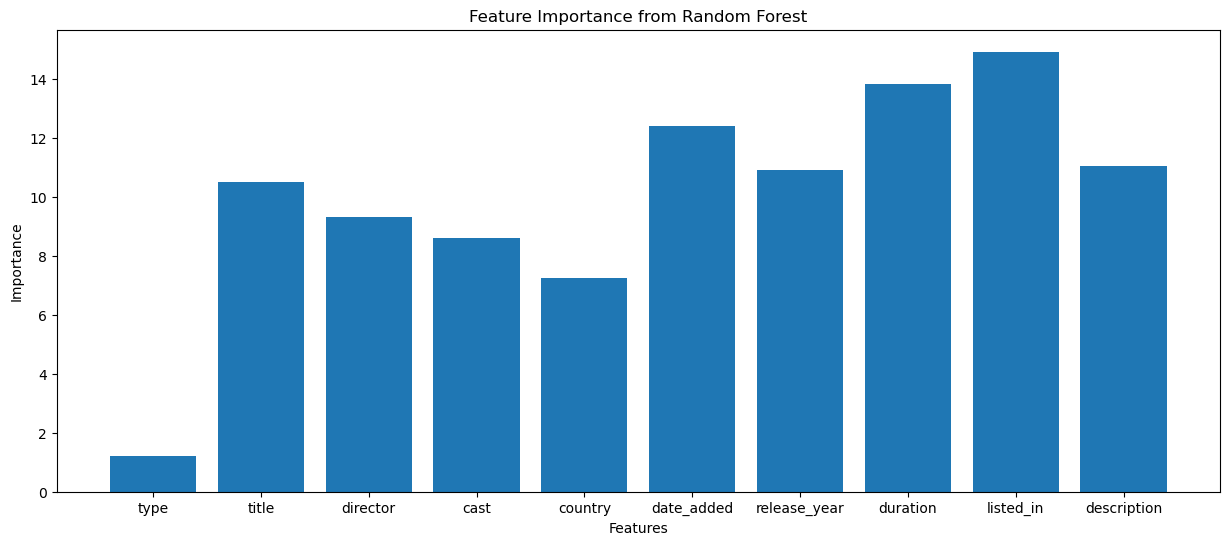

In [347]:
# Plot feature importances as a bar chart
plt.figure(figsize=(15, 6))
plt.bar(X.columns, feature_importance_percentage)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

### In the graph presented above, we have observed that the "type" variable exhibits relatively lower importance, particularly in the context of distinguishing between categories such as movies or TV shows. Nevertheless, retaining this information in our model serves educational and informational purposes.

In [314]:
final_df

,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating
0,-0.48,-1.03,-0.41,1.69,0.56,1.62,0.77,0.99,-0.01,-0.77,7.00
1,2.08,-1.42,1.15,-1.72,-0.27,1.61,0.87,-0.11,0.97,-1.12,11.00
2,2.08,-0.73,-0.54,1.04,1.25,1.61,0.87,-1.32,-0.23,1.25,11.00
3,2.08,-0.36,1.15,1.69,1.25,1.61,0.87,-1.32,0.15,-0.33,11.00
4,2.08,-0.20,1.15,0.34,-1.10,1.61,0.87,-0.11,0.82,0.01,11.00
...,...,...,...,...,...,...,...,...,...,...,...
57721,2.08,-0.09,1.15,-0.84,-2.22,-0.62,0.29,-1.32,1.10,-1.22,17.00
57722,2.08,-0.09,1.15,-0.84,-2.22,-0.62,0.29,-1.32,1.10,-1.22,17.00
57723,-0.48,-1.89,1.15,0.65,1.25,-0.21,0.48,0.31,1.16,0.51,17.00
57724,2.08,-0.73,1.15,-0.19,-0.78,-0.92,0.10,-1.32,-1.36,-1.10,17.00


## We are applying multiple models to assess and identify the best-suited model for our dataset.

In [320]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [321]:
from lazypredict.Supervised import LazyClassifier

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LazyClassifier instance and fit it to your data
clf = LazyClassifier(predictions=True)
models = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance metrics
models


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [06:46<00:11, 11.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 46180, number of used features: 10
[LightGBM] [Info] Start training from score -2.886697
[LightGBM] [Info] Start training from score -2.887086
[LightGBM] [Info] Start training from score -2.877420
[LightGBM] [Info] Start training from score -2.881275
[LightGBM] [Info] Start training from score -2.887863
[LightGBM] [Info] Start training from score -2.878190
[LightGBM] [Info] Start training from score -2.896453
[LightGBM] [Info] Start training from score -2.902748
[LightGBM] [Info] Start training from score -2.895278
[LightGBM] [Info] Start training from score -2.891759
[LightGBM] [Info] Start training from score -2.905118
[LightGBM] [Info] Start training from score -2.899989

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [06:51<00:00, 14.19s/it]


(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
 Model                                                                          
 ExtraTreesClassifier               0.97               0.97    None      0.97   
 RandomForestClassifier             0.96               0.96    None      0.96   
 XGBClassifier                      0.96               0.96    None      0.95   
 BaggingClassifier                  0.95               0.95    None      0.95   
 LGBMClassifier                     0.95               0.95    None      0.95   
 ExtraTreeClassifier                0.95               0.95    None      0.94   
 DecisionTreeClassifier             0.95               0.95    None      0.94   
 KNeighborsClassifier               0.89               0.89    None      0.88   
 SVC                                0.76               0.77    None      0.75   
 NuSVC                              0.67               0.68    None      0.65   
 LogisticRegression         

In [332]:
from sklearn.ensemble import ExtraTreesClassifier  # Import Extra Trees Classifier

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Selection and Training (Extra Trees Classifier)
model = ExtraTreesClassifier(n_estimators=100, random_state=50)  # Specify the desired hyperparameters
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 96.98596916681102


### the model's accuracy is 97 % which is good 

### to check whether model is overfitting or not 

####  Cross-validation is a  technique for assessing model performance and checking for overfitting and there are many other several methods.

In [333]:
from sklearn.model_selection import cross_val_score

# Define the Extra Trees Classifier with the same hyperparameters
model = ExtraTreesClassifier(n_estimators=100, random_state=50)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()

# Fit the model to the entire training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Mean Cross-Validation Accuracy:", mean_cv_score * 100)
print("Test Set Accuracy:", test_accuracy * 100)


Mean Cross-Validation Accuracy: 96.5804134282911
Test Set Accuracy: 96.98596916681102


#### An accuracy of 96.58% in mean cross-validation and 96.99% on the test set suggests that your model is performing very well. These high accuracy values indicate that the model is making accurate predictions on both the training data (cross-validation) and the unseen test data.

### 5. Is the target balanced or imbalanced? What would you do to the data if the target is imbalanced? How does imbalance in target classes affect your predictions? 

The target column exhibits class imbalance. To address this issue, I have employed an oversampling technique as a remedial approach.

I would address it by using techniques such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE to rebalance the classes, as class imbalance can lead to biased predictions and reduced accuracy for the minority class, affecting the model's ability to capture and make accurate predictions for underrepresented class instances.

Bias: Imbalanced data can lead to model bias, favoring the majority class to maximize overall accuracy. This may compromise the accuracy of minority class predictions.

Poor Generalization: Imbalanced datasets hinder effective generalization to minority classes, impacting real-world applications and leading to inadequate predictions for these classes.

Misleading Metrics: Relying solely on accuracy is unsuitable for imbalanced datasets. Metrics like precision, recall, F1-score, and AUC-ROC offer a more comprehensive assessment of model performance in such scenarios.


### 6. Are there any inappropriate or missing values in the target column? If yes, how would you handle them?

In the provided dataset, where target variable missing values were minimal,we can used approach like predicting model to predict the missing value or imputers but in my case my target column was imbalanced as well so i have used a random oversampling approach was employed to simultaneously address missing values and alleviate class imbalance, which has mitigate the missing values and imabalanced issue.

When dealing with inappropriate or missing values in the target column:

Inappropriate Values: These are values that don't align with defined classes.
To address them i Identify and understand the nature of these values.Correct data entry errors if applicable.
Clarify and redefine target categories if the issue is a misunderstanding.
Missing Values: Missing target values can impact model training. Options:

Remove rows with missing targets if their number is small.Impute missing target values using mode (for classification) or mean/median (for regression) if removal isn't viable.Assess the root cause for widespread missing values. Acquire missing values if collection issues exist.Handling inappropriate or missing values in the target column is vital for data quality and model effectiveness, with the approach depending on the nature and extent of the issues.


### 7. Can you make any new features from this dataset which will be of use to you for predictions?

1. Date Features: Extract valuable insights from the 'date_added' column by deriving date-related features like the day of the week, month, or year when a show was added. These features can shed light on content release trends.

2. Text Mining Features: Delve into the 'description' column for text mining. Extract keywords, sentiment scores, or word counts to gain a deeper understanding of the content. This can lead us for content-based recommendations.

3. Genre or Category Features: If the 'listed_in' column contains multiple genres or categories for each show, so we can create binary indicator variables for each genre. This will allows us to categorize shows based on specific genres.

4. Duration Features: Utilizing the 'duration' column to extract numeric values representing the show's duration. These features will offer insights into content length.

5. Combining Features: Get creative by crafting new features through combinations of existing ones. For example, we can calculate the ratio of the number of cast members to the show's duration, providing insights into the cast-to-content ratio.

6. Country-Based Features: The 'country' column holds potential for creating features related to the listed countries. Options include generating binary indicators for specific countries or calculating the number of countries associated with each show.

### 8. What features do you think would help in predictions, what features do you think may not be important?



Helpful Features for Predictions:
Consider features like keywords from descriptions, genre indicators, and content duration to predict user preferences and recommendations.
Features like the day of the week or content addition month can capture temporal patterns in viewing habits.
'Type' (Movie/TV Show) and one-hot encoded genres provide insights into user content preferences.
Content duration is crucial for predicting user engagement and preference for short or long content.
Sentiment scores and extracted keywords from descriptions can offer valuable insights into viewer sentiment and content themes.

Features That May Be Less Important:
Unique identifiers like 'show_id' typically don't contribute to predictions.
The influence of directors and cast members can vary across different content.
The country where content is produced may not be significant for predictions unless users have region-specific preferences.
While the release year reveals historical trends, it might have limited impact on current viewer preferences.

### 9. Prepare this data using appropriate transformations (encoding).

In [361]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import  StandardScaler

df = pd.read_csv("netflix_titles.csv") 
pd.set_option('display.max_colwidth',1000)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."


In [362]:
label_encoders = {}

# Encode each categorical column
for column in df.columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7692,603,1711,72,7,210,274,2577
1,1111,1,1091,4528,409,426,1706,73,11,110,414,1762
2,2222,1,2651,2105,6296,748,1706,73,11,0,242,7341
3,3333,1,3506,4528,7692,748,1706,73,11,0,297,3617
4,4444,1,3861,4528,4815,251,1706,73,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,59,8,70,269,895
8803,8672,1,8773,4528,7692,748,788,70,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,61,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,58,6,206,125,3315


In [363]:
imputeKNN=KNNImputer(n_neighbors=5000)
df_imputed=imputeKNN.fit_transform(df)
columns = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
df_imputed=pd.DataFrame(df_imputed,columns=columns)
df_imputed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0.00,0.00,1975.00,2295.00,7692.00,603.00,1711.00,72.00,7.00,210.00,274.00,2577.00
1,1111.00,1.00,1091.00,4528.00,409.00,426.00,1706.00,73.00,11.00,110.00,414.00,1762.00
2,2222.00,1.00,2651.00,2105.00,6296.00,748.00,1706.00,73.00,11.00,0.00,242.00,7341.00
3,3333.00,1.00,3506.00,4528.00,7692.00,748.00,1706.00,73.00,11.00,0.00,297.00,3617.00
4,4444.00,1.00,3861.00,4528.00,4815.00,251.00,1706.00,73.00,11.00,110.00,393.00,4416.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671.00,0.00,8770.00,979.00,4677.00,603.00,1419.00,59.00,8.00,70.00,269.00,895.00
8803,8672.00,1.00,8773.00,4528.00,7692.00,748.00,788.00,70.00,14.00,110.00,424.00,8483.00
8804,8673.00,0.00,8774.00,3631.00,3231.00,603.00,1366.00,61.00,8.00,206.00,207.00,5228.00
8805,8674.00,0.00,8777.00,3247.00,7061.00,603.00,665.00,58.00,6.00,206.00,125.00,3315.00


In [364]:
X = df_imputed.drop(columns=['rating'])
y = df_imputed['rating']

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [365]:
# Standardization (Z-score scaling)
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X_resampled)
X_std = pd.DataFrame(X_std, columns=X_resampled.columns) 

In [366]:
final_df = pd.concat([X_std, y_resampled], axis=1)
final_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating
0,-2.35,-0.48,-1.03,-0.41,1.69,0.56,1.62,0.77,0.99,-0.01,-0.77,7.00
1,-1.86,2.08,-1.42,1.15,-1.72,-0.27,1.61,0.87,-0.11,0.97,-1.12,11.00
2,-1.37,2.08,-0.73,-0.54,1.04,1.25,1.61,0.87,-1.32,-0.23,1.25,11.00
3,-0.88,2.08,-0.36,1.15,1.69,1.25,1.61,0.87,-1.32,0.15,-0.33,11.00
4,-0.39,2.08,-0.20,1.15,0.34,-1.10,1.61,0.87,-0.11,0.82,0.01,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...
57721,0.74,2.08,-0.09,1.15,-0.84,-2.22,-0.62,0.29,-1.32,1.10,-1.22,17.00
57722,0.74,2.08,-0.09,1.15,-0.84,-2.22,-0.62,0.29,-1.32,1.10,-1.22,17.00
57723,0.09,-0.48,-1.89,1.15,0.65,1.25,-0.21,0.48,0.31,1.16,0.51,17.00
57724,0.50,2.08,-0.73,1.15,-0.19,-0.78,-0.92,0.10,-1.32,-1.36,-1.10,17.00


### Here is the finalized dataset, prepared for training with the necessary transformations applied.

### 10. Choose an appropriate classifier and train the model, keeping a portion of data for testing

I have perform Extra Trees Classifier model which has given 97% accuracy. 
A common split ratio is 70% for training and 30% for testing, but this can vary depending on the size of your dataset and your specific requirements.


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

# Split the data into training and testing sets (e.g., 70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Evaluate the model using the testing data
accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

### portion of data for testing

In [369]:
X_test,y_test

(       type  title  director  cast  country  date_added  release_year  \
 1757   2.08  -0.17      1.15 -1.39     0.56        0.98          0.58   
 32623 -0.48  -1.50     -1.90  0.40     0.56        0.80          0.68   
 19262 -0.48  -0.70      1.03  0.08     0.56        0.97         -5.20   
 23153 -0.48  -1.42     -1.99  0.18    -1.48       -1.04          0.10   
 27854 -0.48   0.07      0.98 -1.37    -0.23       -0.62          0.39   
 ...     ...    ...       ...   ...      ...         ...           ...   
 29747 -0.48  -1.80     -1.44 -0.94    -2.22        0.02          0.87   
 4228  -0.48   1.88     -0.65  1.57     0.56       -0.36         -0.19   
 30756 -0.48   0.38     -0.41  1.11    -0.78        0.18          0.58   
 24680 -0.48  -1.42     -1.99  0.18    -1.48       -1.04          0.10   
 24211 -0.48  -1.42     -1.99  0.18    -1.48       -1.04          0.10   
 
        duration  listed_in  description  
 1757      -1.32       1.02        -1.79  
 32623      1.03       0

### 11. How would you evaluate your model's performance? Summarize and explain your results.

To evaluate the performance of the Extra Trees Classifier model, we primarily used accuracy as the evaluation metric, and it yielded an impressive accuracy of 97%. This result indicates that the model correctly classified 97% of the instances in the test dataset, which is a strong indication of its capability to make accurate predictions.

Beyond accuracy, we assess the model's performance in several method that are

Precision and Recall: These metrics help us understand how well the model handles true and false positives and negatives. High precision means fewer false positives, while high recall indicates fewer false false negatives.

F1-Score: This metric strikes a balance between precision and recall, making it particularly useful for imbalanced datasets as it considers both false positives and false negatives.

Confusion Matrix: It offers a detailed view of how the model performs across different classes.

ROC Curve and AUC: In binary classification, these metrics evaluate the model's ability to distinguish between classes.

Feature Importance: We delve into which features have the most influence on the model's predictions.